Time Series COVID - 19 Forecasting : Living with the virus may be the new normal , but analysing the trends of spread of coronavirus and it's contagiousness can help mitigate its effects . Analysis and visualization of virus spread data can reveal meaningful trends for various geographical locations . Moreover , statistical and ML modelling of everyday cases and deaths can provide useful insights into the future severity of the viral disease .

# Exploratory Time - Series Data Analysis and Visualization

So , let us first import the latest COVID - 19 data so we have more data and features to work with .

In [6]:
## Importing librries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [20]:
# loading the dataset
Confirmed=pd.read_csv('time_series_covid19_confirmed_global.csv')
Deaths=pd.read_csv('time_series_covid19_deaths_global.csv')
Recovered=pd.read_csv('time_series_covid19_recovered_global.csv')

In [21]:
Confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,29906,30574,31362,32250,33006,33843,34401,35003,35686,36151
262,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2009,2011,2013,2016,2019,2022,2024,2026,2026,2028
264,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,13466,13539,13720,13819,13887,13928,14022,14070,14131,14175


In [22]:
#the transpose of three datasets
Confirmed.T.head(),Deaths.T.head(),Recovered.T.head()

(                        0        1        2        3        4    \
 Province/State          NaN      NaN      NaN      NaN      NaN   
 Country/Region  Afghanistan  Albania  Algeria  Andorra   Angola   
 Lat                33.93911  41.1533  28.0339  42.5063 -11.2027   
 Long              67.709953  20.1683   1.6596   1.5218  17.8739   
 1/22/20                   0        0        0        0        0   
 
                                 5          6        7    \
 Province/State                  NaN        NaN      NaN   
 Country/Region  Antigua and Barbuda  Argentina  Armenia   
 Lat                         17.0608   -38.4161  40.0691   
 Long                       -61.7964   -63.6167  45.0382   
 1/22/20                           0          0        0   
 
                                          8                9    ...  \
 Province/State  Australian Capital Territory  New South Wales  ...   
 Country/Region                     Australia        Australia  ...   
 Lat           

In [9]:
confirmed['Country/Region'].value_counts()

China             33
Canada            14
United Kingdom    11
France            11
Australia          8
                  ..
Greece             1
Grenada            1
Guatemala          1
Guinea             1
Zimbabwe           1
Name: Country/Region, Length: 188, dtype: int64

In [23]:
print(Confirmed['Country/Region'].unique(),Confirmed['Country/Region'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo (Brazzaville)'
 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Diamond Princess' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Holy See'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jo

In [24]:
#Filter the 3 dataframe for data of India only
india_Confirmed=Confirmed[Confirmed['Country/Region']=="India"].T
india_Deaths=Deaths[Deaths['Country/Region']=="India"].T
india_Recovered=Recovered[Recovered['Country/Region']=="India"].T
print(india_Confirmed)
print(india_Deaths)
print(india_Recovered)

                      143
Province/State        NaN
Country/Region      India
Lat             20.593684
Long             78.96288
1/22/20                 0
...                   ...
9/17/20           5214677
9/18/20           5308014
9/19/20           5400619
9/20/20           5487580
9/21/20           5487580

[248 rows x 1 columns]
                      143
Province/State        NaN
Country/Region      India
Lat             20.593684
Long             78.96288
1/22/20                 0
...                   ...
9/17/20             84372
9/18/20             85619
9/19/20             86752
9/20/20             87882
9/21/20             87882

[248 rows x 1 columns]
                      130
Province/State        NaN
Country/Region      India
Lat             20.593684
Long             78.96288
1/22/20                 0
...                   ...
9/17/20           4112551
9/18/20           4208431
9/19/20           4303043
9/20/20           4396399
9/21/20           4396399

[248 rows x 1 c

In [25]:
india_join=india_Confirmed.join(india_Deaths,how='left',lsuffix='_Confirmed',rsuffix='_Deaths')
india=india_join.join(india_Recovered,how='left',lsuffix='_',rsuffix='_Recovered')
india=india.rename(columns={"143_Confirmed":"Confirmed","143_Deaths":"Deaths",130:"Recovered"})

In [26]:
india


,Confirmed,Deaths,Recovered
Province/State,NaN,NaN,NaN
Country/Region,India,India,India
Lat,20.593684,20.593684,20.593684
Long,78.96288,78.96288,78.96288
1/22/20,0,0,0
...,...,...,...
9/17/20,5214677,84372,4112551
9/18/20,5308014,85619,4208431
9/19/20,5400619,86752,4303043
9/20/20,5487580,87882,4396399


In [28]:
#Exclude the less significant rowa of the data
india=india[4:]

In [29]:
india

,Confirmed,Deaths,Recovered
1/22/20,0,0,0
1/23/20,0,0,0
1/24/20,0,0,0
1/25/20,0,0,0
1/26/20,0,0,0
...,...,...,...
9/17/20,5214677,84372,4112551
9/18/20,5308014,85619,4208431
9/19/20,5400619,86752,4303043
9/20/20,5487580,87882,4396399


In [30]:
india.index=pd.to_datetime(india.index)

In [31]:
india

,Confirmed,Deaths,Recovered
2020-01-22,0,0,0
2020-01-23,0,0,0
2020-01-24,0,0,0
2020-01-25,0,0,0
2020-01-26,0,0,0
...,...,...,...
2020-09-17,5214677,84372,4112551
2020-09-18,5308014,85619,4208431
2020-09-19,5400619,86752,4303043
2020-09-20,5487580,87882,4396399


In [32]:
split_point=int(0.7*len(india))
print(split_point)
train=india[0:split_point]
test=india[split_point:]

170


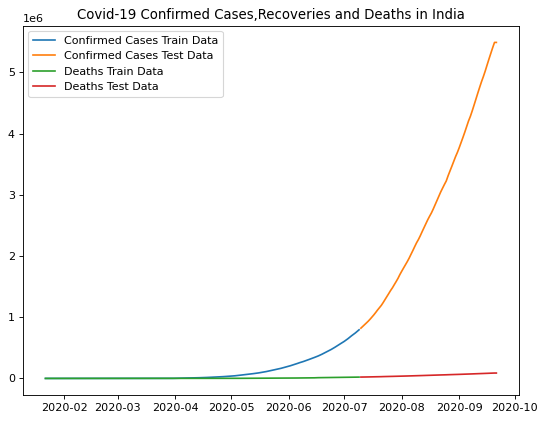

In [33]:
import matplotlib.pyplot as plt

plt.figure(num=None,figsize=(8,6),dpi=80)
plt.plot(train.Confirmed,label='Confirmed Cases Train Data')
plt.plot(test.Confirmed,label='Confirmed Cases Test Data')
plt.plot(train.Deaths,label='Deaths Train Data')
plt.plot(test.Deaths,label='Deaths Test Data')
plt.legend()
plt.title("Covid-19 Confirmed Cases,Recoveries and Deaths in India")
plt.show()



In [34]:
#Resample the data to weekly interval
resample=train.resample('7D')
weekly=resample.sum()
print(weekly)


            Confirmed  Deaths  Recovered
2020-01-22          0       0          0
2020-01-29         11       0          0
2020-02-05         21       0          0
2020-02-12         21       0          9
2020-02-19         21       0         21
2020-02-26         25       0         21
2020-03-04        261       0         22
2020-03-11        693      13         56
2020-03-18       2355      43        166
2020-03-25       6930     170        565
2020-04-01      23867     673       1785
2020-04-08      59830    2020       6489
2020-04-15     112060    3656      17806
2020-04-22     183925    5835      42226
2020-04-29     283223    9429      77095
2020-05-06     444062   14681     137233
2020-05-13     638985   20307     237188
2020-05-20     920750   27152     382859
2020-05-27    1274960   36255     596123
2020-06-03    1725903   48476     832062
2020-06-10    2243635   66002    1135856
2020-06-17    2874657   93198    1584666
2020-06-24    3701957  112743    2167385
2020-07-01    47

In [35]:
#Resample the data to weekly interval
resample=train.resample('1M')
monthly=resample.sum()
print(monthly)


            Confirmed  Deaths  Recovered
2020-01-31          2       0          0
2020-02-29         84       0         42
2020-03-31      10252     226        818
2020-04-30     447607   14417      85811
2020-05-31    3088494   94154    1216954
2020-06-30   10951713  331856    5916008
2020-07-31    6272257  177197    3836151


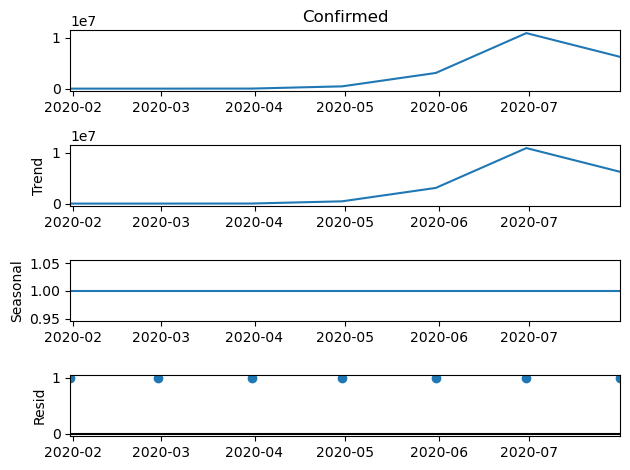

In [36]:
#Decompose the monthly time-series to its components using statements library.
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(monthly.Confirmed, period = 1 ,model="multiplicative")
result.plot()
plt.show();

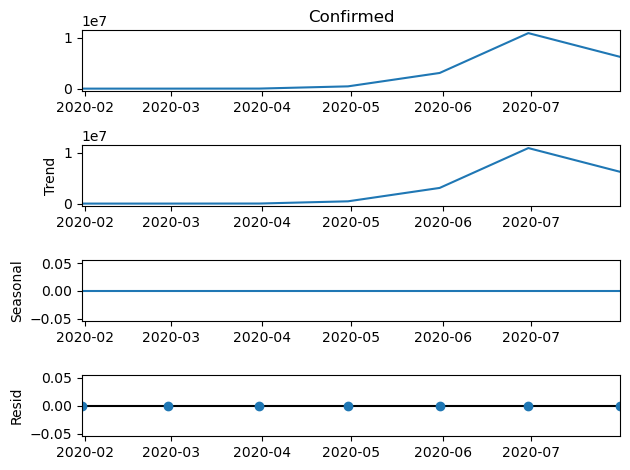

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose ( monthly.Confirmed , period = 1 , model = " multiplicative " )
result.plot ( )
plt.show ( ) ;

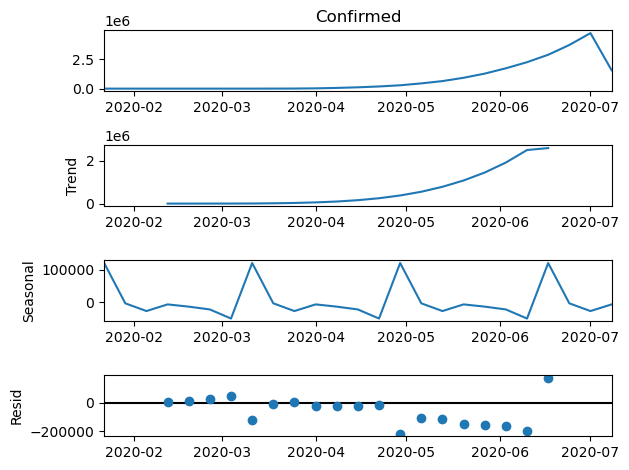

In [38]:
result=seasonal_decompose(weekly.Confirmed,period=7,model='additive')
print(result)
result.plot()
plt.show();

In [39]:
#Convert the dataframe columns into int to eliminate any other datatypes
train.Confirmed=pd.to_numeric(train.Confirmed)
train.Deaths=pd.to_numeric(train.Deaths)
train.Recovered=pd.to_numeric(train.Recovered)
test.Confirmed=pd.to_numeric(test.Confirmed)
train.Deaths=pd.to_numeric(test.Deaths)
test.Recovered=pd.to_numeric(test.Recovered)

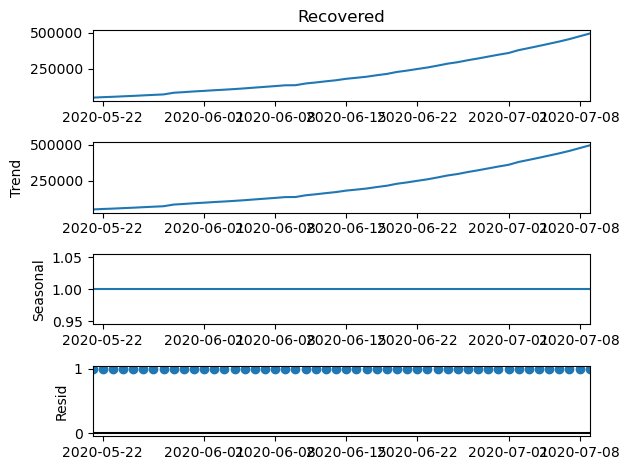

In [40]:
#Decompose the Covid-19 time series
X=train.Recovered[120:]
result=seasonal_decompose(X,period=1,model='multiplicative')
result.plot()
plt.show();

In [41]:
from statsmodels.tsa.stattools import adfuller

X=train.Confirmed
result=adfuller(X)
print('ADF Statistic:%f '%result[0])
print('p-value:%f '%result[1])
print('Critical Values:')
for key,value in result[4].items():
    print('\t%s:%.3f'%(key,value))

ADF Statistic:0.026931 
p-value:0.960703 
Critical Values:
	1%:-3.473
	5%:-2.880
	10%:-2.577


In [42]:
from statsmodels.tsa.stattools import kpss
statistic,p_value,n_lags,critical_values=kpss(india.Confirmed)
print(f'KPSS Statistic:{statistic}')
print(f'p-value:{p_value}')
print(f'num lags:{n_lags}')
print('Critial Values:')
for key,value in critical_values.items():
    print(f' {key}{value}')
print(f'Result:The series is {"not" if p_value < 0.05 else""} stationary')

KPSS Statistic:1.659488067662081
p-value:0.01
num lags:10
Critial Values:
 10%0.347
 5%0.463
 2.5%0.574
 1%0.739
Result:The series is not stationary


C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


# Time-series Modelling and validation

In [43]:
#Prediction is mean of historical data of COVID-19 deaths

pred=train.Confirmed.mean()

#For single trdin-test split the prediction will be same for all the test points

prediction=[pred]*len(test)

#Add predictions asacolumn in test

test['Prediction']=prediction

In [44]:
#Calculating the RMSE between actual values and prediction
from sklearn import metrics
from math import sqrt
error=sqrt(metrics.mean_squared_error(test.Confirmed,test.Prediction))
print(error)


3024765.6095847026


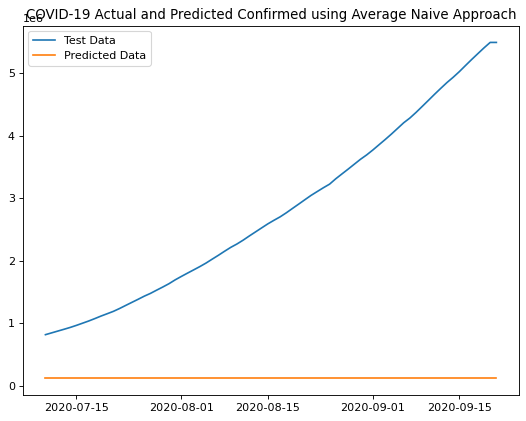

In [45]:
#Visualize the test data and naive average method predictions using matplotlib
import matplotlib.pyplot as plt
                         
plt.figure(num=None,figsize=(8,6),dpi=80)
plt.plot(test.Confirmed,label="Test Data")
plt.plot(test.Prediction,label="Predicted Data")
plt.legend()
plt.title('COVID-19 Actual and Predicted Confirmed using Average Naive Approach')
plt.show()

When we make a train-test split and make out-of-sample prediction for a large prediction horizon,the error tends to accumulate.

# Walk-Forward Validation

In [47]:
# Walk - forward validation for average naive method
import numpy as np

pred_wf = []
X = train.Confirmed.values

# For every element in test , make a prediction , append the test point to training set and Loop ahead
for i in test.Confirmed :
    pred = X.mean() 
    pred_wf.append (pred)
    X = np.append (X ,i)

In [48]:
# Add the walk forward prediction as a column in test data
test['pred_wf'] = pred_wf

pred_wf

[122178.87647058823,
 126265.05847953216,
 130470.04069767441,
 134792.49132947976,
 139229.04022988505,
 143783.05142857143,
 148470.9715909091,
 153303.5197740113,
 158279.81460674157,
 163416.69273743016,
 168721.07777777777,
 174172.0,
 179770.38461538462,
 185557.42076502732,
 191549.54347826086,
 197741.2972972973,
 204127.82258064515,
 210713.32085561496,
 217465.2340425532,
 224418.69312169313,
 231563.66315789474,
 238910.16753926701,
 246499.11458333334,
 254293.0207253886,
 262279.6288659794,
 270451.24615384615,
 278807.38265306124,
 287364.3807106599,
 296150.79292929295,
 305158.13065326633,
 314397.39,
 323853.49253731343,
 333481.32178217825,
 343314.60591133,
 353379.9117647059,
 363661.9121951219,
 374158.32038834953,
 384862.6376811594,
 395741.48557692306,
 406779.4736842105,
 418019.82380952383,
 429483.82938388624,
 441164.68396226416,
 453063.91549295775,
 465175.4859813084,
 477460.0093023256,
 489913.0787037037,
 502515.0783410138,
 515394.5229357798,
 528509.1

In [49]:
# Calculate RMSE for walk forward validation using average naive method
error = sqrt ( metrics.mean_squared_error ( test.Confirmed ,test.pred_wf)) 
print ( error )

2647251.917004717


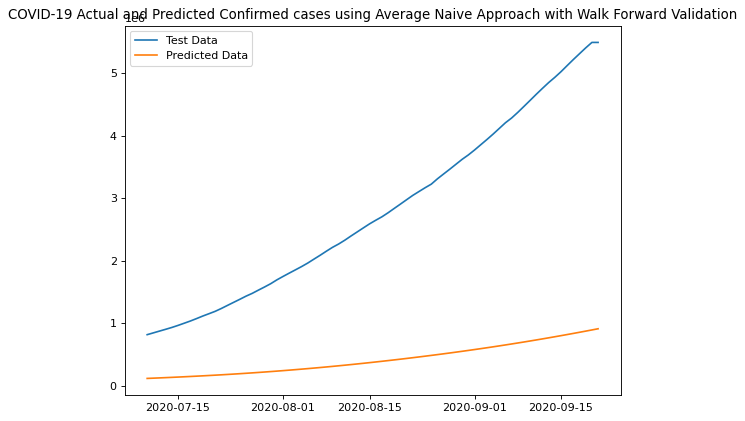

In [50]:
# Plot the actual and predicted values

plt.figure(num=None, figsize=(8, 6), dpi=80)

plt.plot(test.Confirmed, label="Test Data")

plt.plot(test.pred_wf, label= "Predicted Data")

plt. legend()

plt.title('COVID-19 Actual and Predicted Confirmed cases using Average Naive Approach with Walk Forward Validation' )
plt.show()

 

 


We can observe from the error values and the plots that the walk forward validation reveals better results.

Lets look at another naive approach ie. Naive method bofore moving on to statistical modeling approaches.

In [51]:
1 # Prediction is the Last observed value of historical data of COVID-19 Confirmed cases
pred = train.Confirmed[-1]

# For single train-test split the prediction will be same for all the test points
prediction = [pred]*len(test)

# Add predictions as a column in test

test[ 'Prediction_NM'] = prediction 


In [52]:
 # Calculate the error between actual value and predicted value
error = sqrt(metrics.mean_squared_error(test .Confirmed, test .Prediction_NM))
print (error)


2450534.4932774827


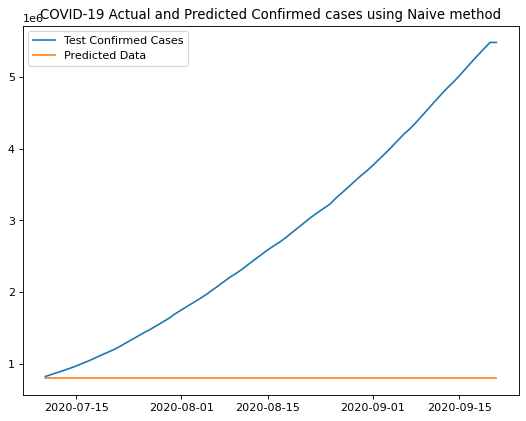

In [53]:
# Visualize the test data and naive method predictions using matpLotlib
import matplotlib.pyplot as plt

plt.figure(num=None, figsize=(8, 6), dpi=80)

plt.plot(test.Confirmed, label="Test Confirmed Cases")
plt.plot(test.Prediction_NM, label="Predicted Data")

plt. legend()

plt.title('COVID-19 Actual and Predicted Confirmed cases using Naive method' )
plt.show()



Let's use the Naive approach with walk-forward validation.

In [54]:
pred_nm_wf = []
X = train.Confirmed.values

# For every element in test, make a prediction, append the test point to training set and Loop ahead
for i in test.Confirmed:

    pred = X[-1]

    pred_nm_wf.append(pred)

    X = np.append(X, i)


In [55]:
# Add the walk forward prediction as a column in test data
test['pred_nm_wf'] = pred_nm_wf


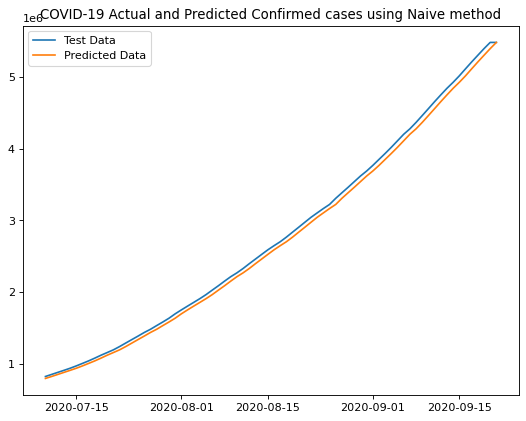

In [56]:
# Visualize the test data and naive method predictions using matplotlib
import matplotlib.pyplot as plt

plt.figure(num=None, figsize=(8, 6), dpi=80)

plt.plot (test.Confirmed, label="Test Data")

plt.plot(test.pred_nm_wf, label="Predicted Data")

plt. legend(),

plt.title('COVID-19 Actual and Predicted Confirmed cases using Naive method')
plt.show()


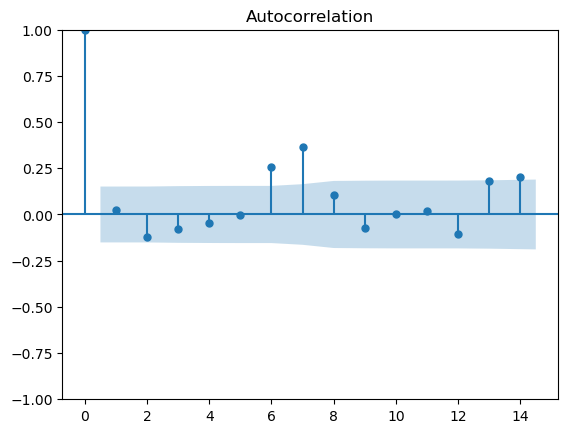

In [57]:
# Plot Autocorrelation Plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf ( train.Confirmed.diff ( ) . diff ( ) . dropna ( ) , lags = 14 )
plt.show ( )

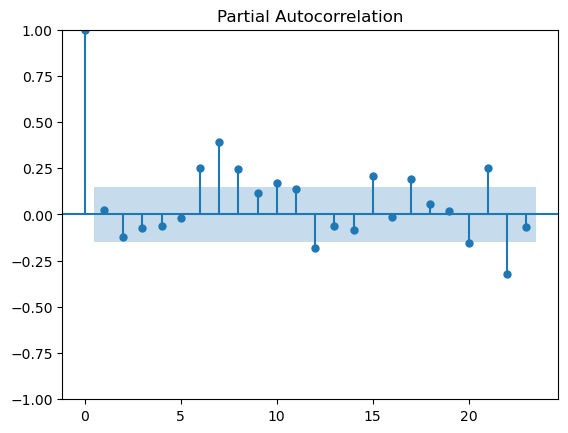

In [58]:
#Plot Partial Autocorrelation Plot
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf ( train.Confirmed.diff( ).diff( ).dropna( ) )
plt.show ( )

# Auto - Regressive Integrated Moving Average ( ARIMA ) Model

ARIMA model is the most popular statistical model for time - series modelling and forecasting , it is a combination of an auto - regressive model and a moving average model on stationary data .

Auto - regressive model ( AR ) : A model that uses the dependent relationship between an observation and some number of lagged observations . In other words , an auto regression models sees the value of a variable at time ' t ' as a linear function of it's values ' p ' time steps preceeding it .

Integrated : The use of differencing of raw observations ( e.g. subtracting an observation from an observation at the previous time step ) in order to make the time series stationary .

Moving - Average Model ( MA ) : A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations . In other words , a moving average model sees the value of a variable at time ' t ' as a linear function of residual errors from ' q ' time steps preceding it . The residual error is calculated by comparing the value at the time ' t ' to moving average of the values preceding .

Each of these components are explicitly specified in the model as a parameter . A standard notation is used of ARIMA ( p.d.q ) where the parameters are substituted with integer values to quickly indicate the specific ARIMA model being used .

The parameters of the ARIMA model are defined as follows :

p : The number of lag observations included in the model , also called the lag order .

d : The number of times that the raw observations are differenced , also called the degree of differencing .

q : The size of the moving average window , also called the order of moving average .

# Seasonal ARIMA : 
This is an extension of ARIMA model to deal with seasonal data . It divides the data into seasonal and non - seasonal components and models them in a similar fashion . It is characterized by 7 parameters , for non - seasonal or trend part ( p.d.q ) parameters same as for ARIMA model and for seasonal part ( P , D , Q , m ) parameters where ' m ' is the number of seasonal periods and P , D , Q are similar to parameters of ARIMA model .

In [59]:
# Fit the SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX ( train.Confirmed ,order = ( 1,2,1 ) , seasonal_order = ( 1,2,1,7 ) )
model_fit = model.fit ( )
#summary of fit model
print ( model_fit.summary ( ) )  

C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                         Confirmed   No. Observations:                  170
Model:             SARIMAX(1, 2, 1)x(1, 2, 1, 7)   Log Likelihood               -1193.564
Date:                           Fri, 03 Mar 2023   AIC                           2397.128
Time:                                   17:47:57   BIC                           2412.312
Sample:                               01-22-2020   HQIC                          2403.296
                                    - 07-09-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0332      0.137     -0.243      0.808      -0.301       0.234
ma.L1         -0.5205      0.116     -4.476

In the summary of the model , you should look at a few important parameters that help you understand how good is your model and compare is to other models . • Log Likelihood : This value on its own is quite meaningless , but it can be helpful if you compare multiple models to each other . Generally speaking , the higher the log - likelihood , the better . However , it should not be the only guiding metric for comparing your models . • Akaike's Information Criterion ( AIC ) : It is a metric that helps you evaluate the strength of your model . Since adding more parameters to your model will always increase your value of the maximum likelihood , the AIC balances this by penalizing for the number of parameters , hence searching for models with few parameters but fitting the data well . Looking at the models with the lowest AIC is a good way to select to best one ! The lower this value is the better the model is performing.

• Bayesian Information Criterion ( BIC ) : It is very similar to AIC , but also considers the number of rows in your dataset . Again , the lower your BIC , the better
your model works . BIC induce a higher penalization for models with complicated parameters compared to AIC .

• Hannan - Quinn Information Criterion ( HQIC ) : It can also be used for feature selection , but is less frequently used .

We also get a summary of model parameters : • Coefficient : It represents the significance of each feature . • Standard Error : It is the estimate of the error of the predicted value . It tells you how strong is the effect of the residual error on your estimated parameters . • Z : It is equal to the values of ' coef divided by ' std err ' . It is thus the standardised coefficient .

• P > | z ] : It is the p - value of the coefficient . It is really important to check these p - values before you continue using the model . If any of these values are higher than your given threshold ( usually 0.05 ) , you might be using an unreliable coefficient that might cause misleading results . • [ 0.025 0.975 ] : It represents the confidence intervals .

In [60]:
# Perform out - of - sample predictions for the entire test data
forecast= model_fit.predict ( start = train.Confirmed.shape[0],end = train.Confirmed.shape[0]+len(test)-1)

In [61]:
# Calculate the error between actual and predicted values
error = sqrt ( metrics.mean_squared_error ( test.Confirmed , forecast ) )
print ( error )

353876.2954121464


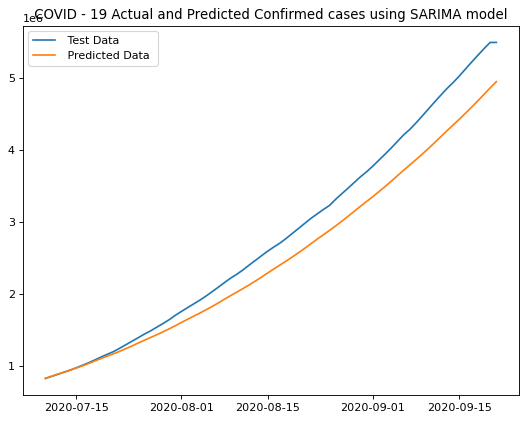

In [62]:
# Plot the actual and predicted values for COVID - 19 related Confirmed cases
plt.figure ( num=None ,figsize = ( 8 , 6 ) , dpi = 80 )
plt.plot ( test.Confirmed ,label = " Test Data " )
plt.plot ( forecast , label = " Predicted Data " )
plt.legend ( )
plt.title ( ' COVID - 19 Actual and Predicted Confirmed cases using SARIMA model ' )
plt.show ( )

In [63]:
# Perform out - of - sample predictions using walk forward validation
pred_ARIMA = [ ]
X = train.Confirmed.values
                                               
# For every element in test , make a prediction , append the test point to training set and Loop ahead
for i in test.Confirmed :
    model_fit = SARIMAX ( X , order = ( 1,1,1 ) ) . fit ( )
    pred=model_fit.forecast ( )
    pred_ARIMA.append ( pred )
    X = np.append ( X , i )

In [64]:
# Add a column in test with prediction by SARIMA model
test['pred_ARIMA'] = pred_ARIMA
test

,Confirmed,Deaths,Recovered,Prediction,pred_wf,Prediction_NM,pred_nm_wf,pred_ARIMA
2020-07-10,820916,22123,515386,122178.876471,122178.876471,793802,793802,[820443.6963811197]
2020-07-11,849522,22673,534618,122178.876471,126265.058480,793802,820916,[848077.8419609092]
2020-07-12,878254,23174,553471,122178.876471,130470.040698,793802,849522,[878287.7349746103]
2020-07-13,906752,23727,571460,122178.876471,134792.491329,793802,878254,[906982.2815822115]
2020-07-14,936181,24309,592032,122178.876471,139229.040230,793802,906752,[935224.3513525702]
...,...,...,...,...,...,...,...,...
2020-09-17,5214677,84372,4112551,122178.876471,840888.464435,793802,5118253,[5213279.098981538]
2020-09-18,5308014,85619,4208431,122178.876471,859112.583333,793802,5214677,[5310684.334938078]
2020-09-19,5400619,86752,4303043,122178.876471,877572.755187,793802,5308014,[5402203.921262522]
2020-09-20,5487580,87882,4396399,122178.876471,896263.028926,793802,5400619,[5493733.39175794]


In [65]:
# Calculate the error between actual and predicted values
error = sqrt ( metrics.mean_squared_error ( test.Confirmed , test.pred_ARIMA ) )
print ( error )


11891.785920024324


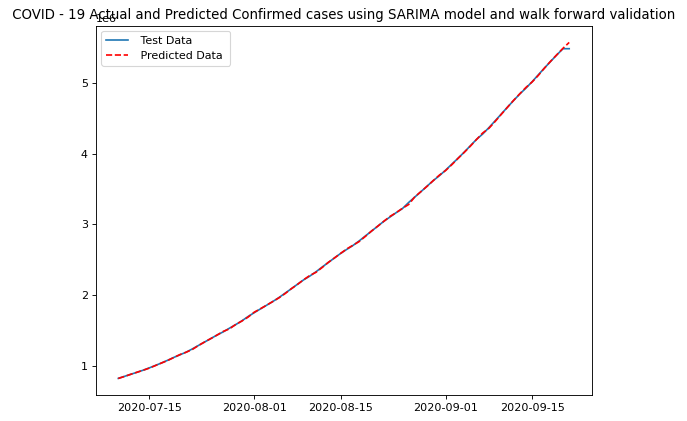

In [66]:
# Plot actual and predicted data
plt.figure ( num = None , figsize = ( 8 , 6 ) , dpi = 80 )
plt.plot ( test.Confirmed , label = " Test Data " )
plt.plot ( test.pred_ARIMA , 'r--' , label = " Predicted Data " )
plt.legend ( )
plt.title ( ' COVID - 19 Actual and Predicted Confirmed cases using SARIMA model and walk forward validation ' )
plt.show ( )

In [67]:
! pip install pmdarima

     -------------------------------------- 572.0/572.0 kB 2.2 MB/s eta 0:00:00


# Auto ARIMA


The auto - ARIMA process seeks to identify the most optimal parameters for an ARIMA model , settling on a single fitted ARIMA model . Auto - ARIMA works by
conducting differencing tests to determine the order of differencing , d , and then fitting models within ranges of defined start_p , max_p , start_q , max_q ranges .
If the seasonal optional is enabled , auto - ARIMA also seeks to identify the optimal P D , and Q hyper- parameters . In order to find the best model , auto - ARIMA
optimizes for a given information_criterion , one of Akaike Information Criterion ( AIC ) , Corrected Akaike Information Criterion ( AICC ) , Bayesian Information
Criterion ( BIC ) , Hannan - Quinn Information Criterion ( HQIC ) , or " out of bag " ( OOB ) for validation scoring .


In [69]:
from pmdarima.arima import auto_arima

arima_model = auto_arima ( train.Confirmed , start_p = 1 , d = 1 , start_q = 1 , max_p = 5 , max_d = 2 , max_q = 5 , start_P = 1 , D = None , start_Q = 1, max_P = 1 , max_D = 1 , max_Q= 1 , max_order = 5 , m= 7 , seasonal = True , stationary = False , information_criterion = 'bic' ,alpha = 0.05 , trace = True )




Performing stepwise search to minimize bic
 ARIMA(1,1,1)(1,0,1)[7] intercept   : BIC=2617.743, Time=1.39 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : BIC=3468.933, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : BIC=inf, Time=0.49 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : BIC=inf, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[7]             : BIC=3530.927, Time=0.02 sec
 ARIMA(1,1,1)(0,0,1)[7] intercept   : BIC=2647.703, Time=1.37 sec
 ARIMA(1,1,1)(1,0,0)[7] intercept   : BIC=2635.741, Time=0.76 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : BIC=2675.082, Time=0.58 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : BIC=inf, Time=0.86 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : BIC=2629.307, Time=0.91 sec
 ARIMA(2,1,1)(1,0,1)[7] intercept   : BIC=2626.343, Time=1.61 sec
 ARIMA(1,1,2)(1,0,1)[7] intercept   : BIC=2622.978, Time=1.46 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : BIC=3008.577, Time=0.81 sec
 ARIMA(0,1,2)(1,0,1)[7] intercept   : BIC=inf, Time=1.82 sec
 ARIMA(2,1,0)(1,0,1)[7] intercept   : BIC=2623.718, T

In [70]:
arima_model.summary ( )

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  170
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 7)   Log Likelihood               -1293.482
Date:                           Fri, 03 Mar 2023   AIC                           2598.964
Time:                                   17:52:05   BIC                           2617.743
Sample:                               01-22-2020   HQIC                          2606.585
                                    - 07-09-2020                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     33.2759     20.933      1.590      0.112      -7.751      74.303
ar.L1          1.0000      0.009    111.741      0.000       0.982       1.018
ma.L1         -0.4084      0.054     -7.591      0.000      -0.514      -0.303
ar.S.L7        0.9530      0.050     18.895      0.000       0.854       1.052
ma.S.L7       -0.5342      0.092     -5.819      0.000      -0.714      -0.354
sigma2      2.455e+05   2.08e+04     11.800      0.000    2.05e+05    2.86e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):                39.78
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):              65.83   Skew:                             0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [71]:
test ['AutoArima'] = forecast

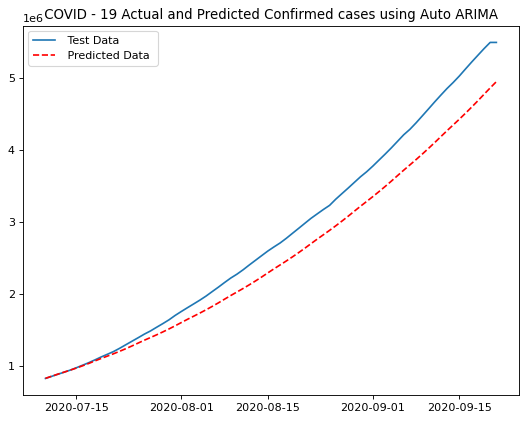

In [72]:
# Plot actual and predicted data
plt.figure ( num =None , figsize = ( 8 , 6 ) , dpi = 80 )
plt.plot ( test.Confirmed , label = " Test Data " )
plt.plot ( test.AutoArima , 'r--' , label = " Predicted Data " )
plt.legend ( )
plt.title ( ' COVID - 19 Actual and Predicted Confirmed cases using Auto ARIMA ' )
plt.show ( )

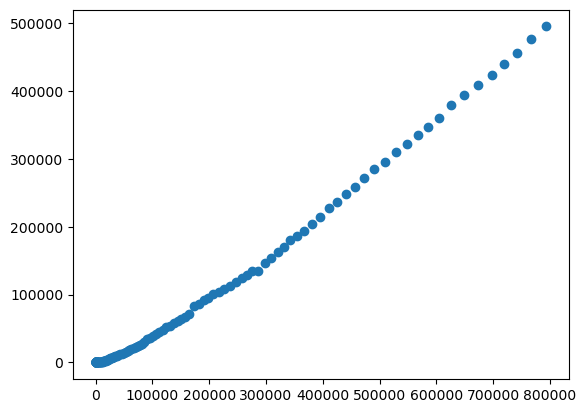

In [73]:
# Scatter plot the data to get an intiution of the correlation to be used
import matplotlib.pyplot as plt
 
    
plt.scatter ( train.Confirmed ,train.Recovered )

plt.show ( )


According to the scatter plot , the Confirmed cases and Recovered cases look linearly related to the Fatalities . Hence , we can use Pearson's correlation .

However , if we feel that a scatterplot is visually indicating a " might be monotonic , might be linear relationship , our best bet would be to apply Spearman and not Pearson . No harm would be done by switching to Spearman even if the data turned out to be perfectly linear . But , if it's not exactly linear and we use. Pearson's coefficient then we'll miss out on the information that Spearman could capture .

In [74]:
from scipy.stats import pearsonr

In [75]:
corr , p = pearsonr ( train . Recovered , train.Confirmed )
print ( corr , p )

0.9955822343844386 1.5610343732858996e-174


We can see that the variables are positively correlated . This suggests a high level of correlation , e.g. a value above 0.5 and close to 1.0 .

Although Pearson's correlation has given enough evidence to use the Deaths variable and Recovered variable as exogenous variables . Let's still see how Spearman's correlation looks like .

In [76]:
from scipy.stats import spearmanr

corr , p = spearmanr ( train . Recovered , train.Confirmed )
print ( corr , p )

0.9936995884356098 1.2875296628064113e-161


Let's go ahead and include the Confirmed cases as exogenous variable in the time - series model .

# Fit the SARIMA model

In [77]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX ( train.Confirmed , order = ( 1,1,1 ) , seasonal_order = ( 0,0,0,0 ) , exog = train . Recovered )
model_fit = model.fit ( )
# summary of fit model
        
print ( model_fit.summary ( ) )
                               

C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Confirmed   No. Observations:                  170
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1329.492
Date:                Fri, 03 Mar 2023   AIC                           2666.984
Time:                        17:54:00   BIC                           2679.503
Sample:                    01-22-2020   HQIC                          2672.065
                         - 07-09-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Recovered      0.0531      0.018      2.881      0.004       0.017       0.089
ar.L1          1.0000      0.004    240.114      0.000       0.992       1.008
ma.L1          0.1142      0.048      2.398      0.0

In [78]:
# Use the previous value of recovered cases to model the confirmed cases of next day
test ['Recovered1'] = test.Recovered.shift(1)
test.Recovered1[0]= train.Recovered [-1]
test.Recovered1                                    

2020-07-10     495513.0
2020-07-11     515386.0
2020-07-12     534618.0
2020-07-13     553471.0
2020-07-14     571460.0
                ...    
2020-09-17    4025079.0
2020-09-18    4112551.0
2020-09-19    4208431.0
2020-09-20    4303043.0
2020-09-21    4396399.0
Name: Recovered1, Length: 74, dtype: float64

In [79]:
# Perform out - of - sample predictions for the entire test data
import numpy as np
forecast=model_fit.predict ( start = ( train.Confirmed.shape [ 0 ] ) , end= ( train.Deaths.shape [ 0 ] + len ( test ) -1 ) , exog = test.Recovered1)
forecast

2020-07-10    8.194561e+05
2020-07-11    8.461647e+05
2020-07-12    8.728392e+05
2020-07-13    8.994936e+05
2020-07-14    9.261022e+05
                  ...     
2020-09-17    2.776857e+06
2020-09-18    2.807152e+06
2020-09-19    2.837894e+06
2020-09-20    2.868567e+06
2020-09-21    2.899175e+06
Freq: D, Name: predicted_mean, Length: 74, dtype: float64

In [80]:
# Calculate the error between actual and predicted values
error = sqrt ( metrics.mean_squared_error ( test.Confirmed , forecast ) )
print ( error )


1255382.4253504274


In [81]:
test ['SARIMAX'] = forecast

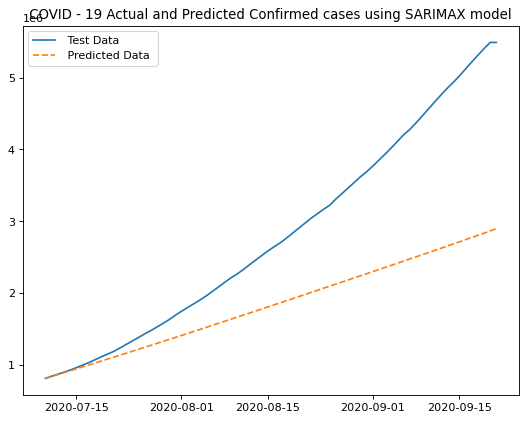

In [82]:
# Plot actual and predicted data
plt.figure ( num = None , figsize = ( 8 , 6 ) , dpi = 80 )
plt.plot ( test.Confirmed , label = " Test Data " )
plt.plot ( test.SARIMAX , '--' , label = " Predicted Data " )
plt.legend ( )
plt.title ( ' COVID - 19 Actual and Predicted Confirmed cases using SARIMAX model ' )
plt.show ( )
                          

Let's try SARIMAX model using walk - forward validation .

In [83]:
 # Perform out - of - sample predictions using walk forward validation
pred_ARIMA = [ ]
X = train.Confirmed.values
y = train.Recovered.values
 # For every element in test , make a prediction , append the test point to training set and Loop ahead
for index , i in test.iterrows( ) :
    model_fit = model = SARIMAX ( X , order = ( 1,1,1 ) , seasonal_order = ( 0,0,0,0 ) , exog = y).fit()
    pred=model_fit.forecast ( exog = np.asarray( y [ -1 ] ).reshape(1,1))
    pred_ARIMA.append(pred)

    X = np.append ( X , i.Confirmed )
    y = np.append ( y , i.Recovered )

C:\Users\asati\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


21719.931074441865


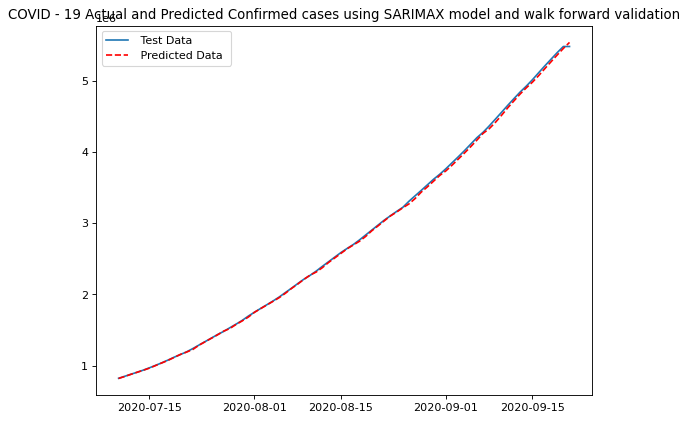

In [84]:
# Add a column in test with prediction by SARIMAX model
test['pred_SARIMAX'] = pred_ARIMA
error = sqrt(metrics.mean_squared_error ( test.Confirmed , test.pred_SARIMAX ) )
print ( error )
# Plot actual and predicted data
plt.figure ( num = None , figsize = ( 8 , 6 ) , dpi = 80 )
plt.plot ( test.Confirmed , label = " Test Data " )
plt.plot ( test.pred_SARIMAX , 'r--' , label = " Predicted Data " )
plt.legend ( )
plt.title ('COVID - 19 Actual and Predicted Confirmed cases using SARIMAX model and walk forward validation')
plt.show ( )

Let's try applying triple exponential smoothing on our data .

In [85]:
#Using statsmodel package for exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing ( train.Confirmed.values , trend ="additive", damped = True )
model_fit = model.fit()

C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Here we are using level smoothing and trend smoothing , so this becomes a double exponential smoothing model , if we include the seasonal parameter as well , it will become a triple exponential smoothing model .

# Predict for future values using exponential smoothing param

In [86]:
predictions_ = model_fit.predict(len(train),len(train)+len(test)-1)

1598304.6630205568


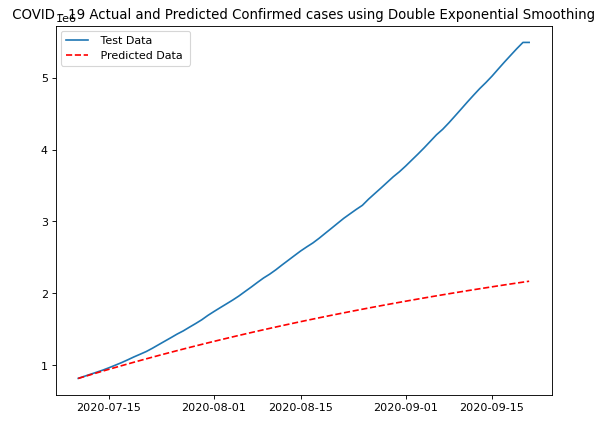

In [87]:
# Add a column in test with prediction by DES model
test ['pred_ES'] = predictions_
error = sqrt ( metrics.mean_squared_error ( test.Confirmed , test.pred_ES ) )
print ( error )
# Plot actual and predicted data
plt.figure ( num = None , figsize = ( 8 , 6 ) , dpi = 80 )
plt.plot ( test.Confirmed , label = " Test Data " )
plt.plot ( test.pred_ES , 'r--' , label = " Predicted Data " )
plt.legend ( )
plt.title ( ' COVID - 19 Actual and Predicted Confirmed cases using Double Exponential Smoothing ' )
plt.show ( )

Let's also try exponential smoothing with walk - forward validation .

In [88]:
# Perform out - of - sample predictions using walk forward validation
pred_WF = [ ]
X = train.Confirmed.values
# For every element in test , make a prediction , append the test point to training set and Loop ahead
for index , i in test.iterrows ( ) :
    model_fit = ExponentialSmoothing ( X , trend = "additive" , damped = True ) .fit ( )
    pred=model_fit.predict ( )
    print(pred[0])
    pred_WF.append(pred[0])
    X = np.append( X , i.Confirmed )

C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


820026.3085604989
847755.0683393785
877820.0604224409


C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


906700.9713520189
934966.4089370131
965297.8952460976
1001159.3096527712
1038435.1106314443
1073987.0574256391
1116037.8061580951


C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


1158213.2775902962
1192152.1830324924
1230412.5956170824


C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


1283940.647807442
1336904.417345993
1385469.689571479


C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


1433758.0229001855
1485070.3704127672
1524168.9641208765


C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


1582612.738107746
1631800.850194389
1686954.1439567208
1756497.77762443


C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


1805041.268848272
1856128.720936444
1907273.543914061
1960500.454958211


C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2020195.8528915052
2088905.6629832666
2149571.060013729
2217087.004848571


C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2276558.754307883
2321849.1527544535
2389661.643727738


C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2462903.4054236836
2525156.6198864155
2590330.3399463454


C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2653346.006489927
2704881.2538158474
2757153.4184434493


C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2831018.154943062
2905862.407131772
2974065.7953234687


C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


3044853.730756333
3113493.4209865816
3167448.9603292174
3227651.773997251


C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


3281245.312386469
3392636.0714019206
3464619.090333835


C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


3539764.026574117
3620243.313489923
3698831.422118304


C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


3761752.9745677756
3845527.0684614987
3935110.529059238
4019070.407307379


C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


4108117.3722159886
4202821.192617333
4294298.931064105


C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


4357622.040275409
4456065.777213095


C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


4558806.732098957
4657277.203516196
4756142.939646787


C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


4848115.316614139
4937869.352263689
5014559.040435873
5108509.261738155
5213460.14941927
5310033.907774383


C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


5400832.853504642
5492305.967234801
5574631.829066339


C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\asati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


11753.685064073004


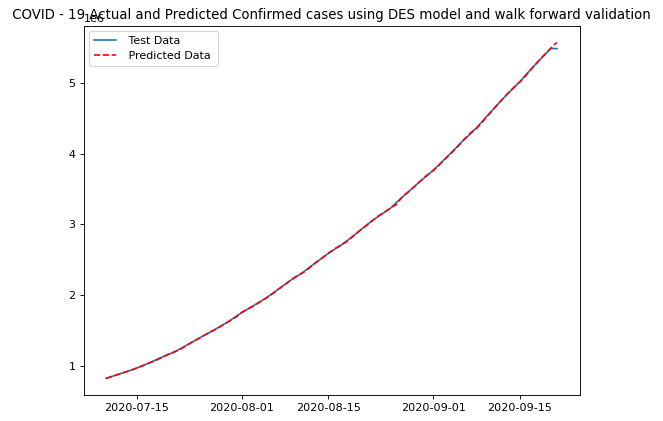

In [89]:
# Add a column in test with prediction by SARIMA model
test ['pred_WF'] = pred_WF
error = sqrt ( metrics.mean_squared_error ( test.Confirmed , test.pred_WF ) )
print ( error )
# Plot actual and predicted data
plt.figure ( num = None , figsize = ( 8 , 6 ) , dpi = 80 )
plt.plot ( test.Confirmed , label = " Test Data " )
plt.plot ( test.pred_WF , 'r--' , label = " Predicted Data " )
plt.legend ( )
plt.title ( ' COVID - 19 Actual and Predicted Confirmed cases using DES model and walk forward validation ' )
plt.show ( )

So far , we contrasted the performance of statistical models with a normal train test - split which aims to predict many steps ahead in future , in our case , 94 steps ahead , after being trained once , against one step ahead walk - forward validation , where we predict one step ahead at a time , and eventually cover the entire test dataset .

We could reproduce the same result each time , i.e. using walk - forward validation , our model was greatly helped and was able to perform better .

Then,we done statistical models for time - series analysis and forecasting , we used highly interpretable tests , plots and models to understand and model various dimensions of the data . Moreover , traditional statistical methods rely on linear relationships to find structure in the data and work well on univariate data.

# Conclusion

• Confirmed , recovered and fatalities seem to be linearly correlated .

• Adding exogenous variables for forecasting of confirmed cases along with walk forward validation gave a more
appropriate forecast .

• Traditional statistical methods rely on linear relationships to find structure in the data and work well on univariate data 
    